## Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset into a pandas Dataframe
marketing = pd.read_csv('Marketing_train.csv')

#Display the 1st 5 rows of the data
marketing.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


## Data Cleaning

In [3]:
# Checking for the unique values present in the categorial features.
for i in marketing.columns:
    if marketing[i].dtype == type(object):
        print(i, end=': ')
        print('\n', marketing[i].unique())
        print()
# Assume 'unknown' are missing values.

profession: 
 ['admin.' 'blue-collar' 'technician' 'management' 'services' 'unemployed'
 'housemaid' 'unknown' 'self-employed' 'retired' 'student' 'entrepreneur']

marital: 
 ['single' 'married' 'divorced' 'unknown']

schooling: 
 ['university.degree' nan 'high.school' 'basic.4y' 'basic.9y'
 'professional.course' 'basic.6y' 'unknown' 'illiterate']

default: 
 ['unknown' 'no' 'yes']

housing: 
 ['no' 'yes' 'unknown']

loan: 
 ['no' 'yes' 'unknown']

contact: 
 ['cellular' 'telephone']

month: 
 ['nov' 'jul' 'may' 'aug' 'apr' 'jun' 'mar' 'oct' 'sep' 'dec']

day_of_week: 
 ['mon' 'wed' 'tue' 'fri' 'thu' nan]

poutcome: 
 ['nonexistent' 'failure' 'success']

responded: 
 ['no' 'yes']



- The categorical features contain NaN values in the form of "unknown"
- To get rid of this we need to read the data again passing the "unknown" to na_values

In [4]:
# Re - reading the data
marketing = pd.read_csv('Marketing_train.csv', na_values='unknown')

# Display the 1st 5 rows of data
marketing.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,NaN,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,NaN,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


## Exploratory Data Analysis

In [5]:
# Checking the size of the data
marketing.shape

(7414, 22)

In [6]:
marketing.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded'],
      dtype='object')

In [7]:
# Summurzing the data using the descriptive statistics
marketing.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
count,5610.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000
mean,40.009804,2.518344,960.024548,0.184111,0.052091,93.570708,-40.561316,3.583141,5165.224251,959.797028,0.361883
std,10.574616,2.695055,192.845029,0.516775,1.568399,0.578345,4.649800,1.744865,73.108669,193.969418,1.261668
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,18.000000


In [8]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
custAge           5610 non-null float64
profession        7353 non-null object
marital           7406 non-null object
schooling         5028 non-null object
default           5982 non-null object
housing           7246 non-null object
loan              7246 non-null object
contact           7414 non-null object
month             7414 non-null object
day_of_week       6703 non-null object
campaign          7414 non-null int64
pdays             7414 non-null int64
previous          7414 non-null int64
poutcome          7414 non-null object
emp.var.rate      7414 non-null float64
cons.price.idx    7414 non-null float64
cons.conf.idx     7414 non-null float64
euribor3m         7414 non-null float64
nr.employed       7414 non-null float64
pmonths           7414 non-null float64
pastEmail         7414 non-null int64
responded         7414 non-null object
dtypes: float64(7), int64(4), ob

## Missing value Analysis

In [9]:
# Checking the total missing values present in each feature of data
marketing.isnull().sum()

custAge           1804
profession          61
marital              8
schooling         2386
default           1432
housing            168
loan               168
contact              0
month                0
day_of_week        711
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

In [10]:
# Check % of missing data
(marketing.isnull().sum())/len(marketing)*100
# Try to impute the data, still if performance is bad then drop the the columns

custAge           24.332344
profession         0.822768
marital            0.107904
schooling         32.182358
default           19.314810
housing            2.265983
loan               2.265983
contact            0.000000
month              0.000000
day_of_week        9.589965
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
pmonths            0.000000
pastEmail          0.000000
responded          0.000000
dtype: float64

## Missing value imputation

In [11]:
# Mean Imputation Missing Values for Numeric Variables
marketing["custAge"] = marketing["custAge"].fillna(marketing["custAge"].mean())

# Mode Imputation of Missing Values for Categorical Variables
marketing["schooling"] = marketing["schooling"].fillna(marketing["schooling"].mode()[0])
marketing["day_of_week"] = marketing["day_of_week"].fillna(marketing["day_of_week"].mode()[0])
marketing["default"] = marketing["default"].fillna(marketing["default"].mode()[0])
marketing["loan"] = marketing["loan"].fillna(marketing["loan"].mode()[0])
marketing["profession"] = marketing["profession"].fillna(marketing["profession"].mode()[0])
marketing["housing"] = marketing["housing"].fillna(marketing["housing"].mode()[0])
marketing["marital"] = marketing["marital"].fillna(marketing["marital"].mode()[0])

# Checking the count of missing values
marketing.isnull().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
dtype: int64

In [12]:
# Checking for the unique values present in categorical columns
for i in marketing.columns:
    if marketing[i].dtype == type(object):
        print(i, end=': ')
        print('\n', marketing[i].unique())
        print()

profession: 
 ['admin.' 'blue-collar' 'technician' 'management' 'services' 'unemployed'
 'housemaid' 'self-employed' 'retired' 'student' 'entrepreneur']

marital: 
 ['single' 'married' 'divorced']

schooling: 
 ['university.degree' 'high.school' 'basic.4y' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']

default: 
 ['no' 'yes']

housing: 
 ['no' 'yes']

loan: 
 ['no' 'yes']

contact: 
 ['cellular' 'telephone']

month: 
 ['nov' 'jul' 'may' 'aug' 'apr' 'jun' 'mar' 'oct' 'sep' 'dec']

day_of_week: 
 ['mon' 'wed' 'tue' 'fri' 'thu']

poutcome: 
 ['nonexistent' 'failure' 'success']

responded: 
 ['no' 'yes']



## Univariate Analysis of Target Variable

In [13]:
# Univariate Analysis
marketing['responded'].value_counts()

no     6574
yes     840
Name: responded, dtype: int64

In [14]:
# Checking the distribution of the target variable in percentage
marketing['responded'].value_counts(normalize = True)
# class Problem

no     0.886701
yes    0.113299
Name: responded, dtype: float64

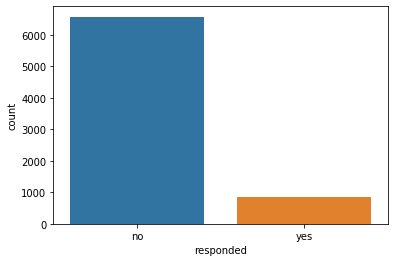

In [15]:
# Countplot to check the distribution of the target variable
sns.countplot(marketing['responded'])

## Outlier Analysis

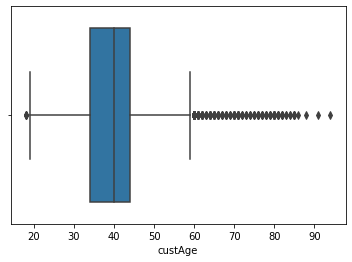

In [16]:
sns.boxplot(marketing['custAge'])

In [17]:
# count the outliers
marketing[marketing['custAge']>60]['custAge'].count()

141

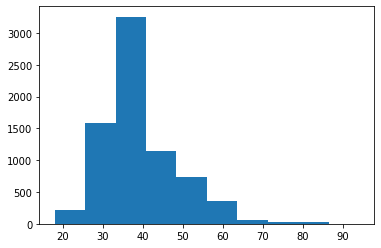

In [18]:
# Plotting a histogram for the variable custAge
ax = plt.hist(marketing['custAge'],bins= 10)

## Bivariate Analysis

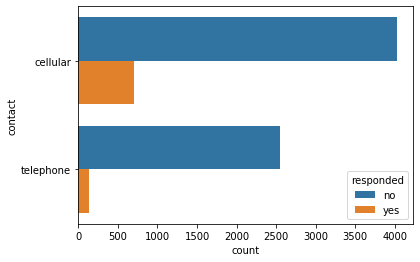

In [19]:
# Checking how many responded when the contact was cellular
sns.countplot(y= marketing['contact'], hue = marketing['responded'])

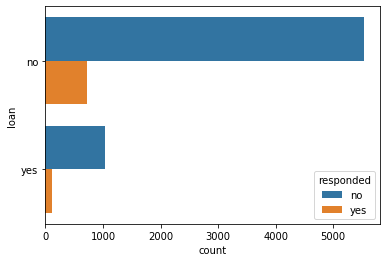

In [20]:
# Checking how loan is affecting the target
sns.countplot(y=marketing['loan'],hue=marketing['responded'])

## Calculate correlation

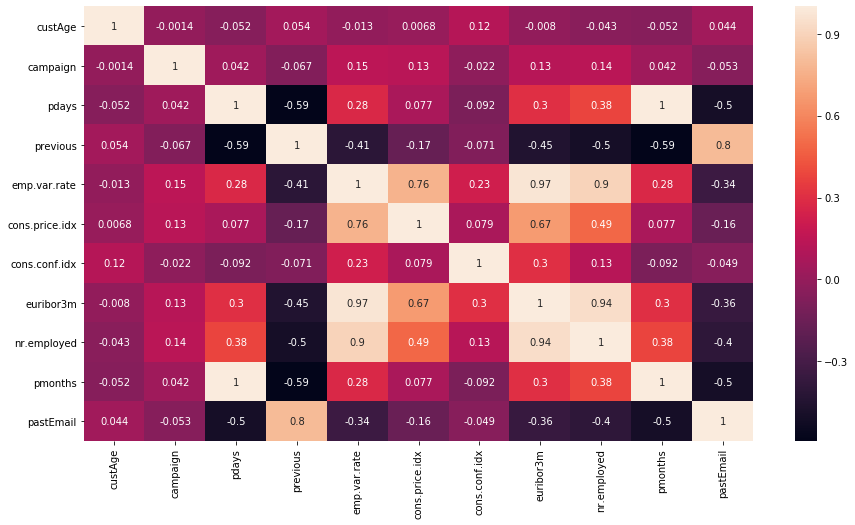

In [21]:
# Calculate the correlation for the dataset
corr = marketing.corr()
# Setting the size of the figure
plt.figure(figsize=(15,8))
# Plot the correaltion using the heatmap
ax = sns.heatmap(corr,annot=True)

## Encoding the categorical variables

In [22]:
# Cols to perform Label Encoding
cols_to_le = ['profession','marital','schooling','contact','month','day_of_week','poutcome','responded']

#label Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in cols_to_le:
    marketing[column] = le.fit_transform(marketing[column])

marketing.head()
# Label encoding affects classification related algorithms like KNN where distance is involved. 
# As per our dataset there are several attr which are categorical.

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,6,no,no,no,0,7,1,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,40.009804,1,1,6,no,no,no,0,3,1,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.000000,9,1,3,no,no,no,1,6,1,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.000000,4,0,6,no,yes,yes,0,3,4,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,40.009804,0,0,6,no,yes,no,0,6,3,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0


In [23]:
#!pip install category_encoders

In [24]:
# Define the columns to perform one hot encoding
cols_to_ohe = ['default','housing','loan']

# Perform one hot encoding on the following columns
import category_encoders as ce

ce_ohe = ce.OneHotEncoder(cols= cols_to_ohe)
marketing = ce_ohe.fit_transform(marketing)

marketing.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,6,1,0,1,0,1,0,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,40.009804,1,1,6,1,0,1,0,1,0,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.000000,9,1,3,1,0,1,0,1,0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.000000,4,0,6,1,0,0,1,0,1,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,40.009804,0,0,6,1,0,0,1,1,0,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0


In [25]:
#pdays has value 999 when not contacted before
#It is a too high value and impact the analysis, so change it to -1

marketing['pdays'].replace(999,-1,inplace=True)
marketing['pmonths'].replace(999,-1,inplace=True)

marketing.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,6,1,0,1,0,1,0,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,-1.0,0,0
1,40.009804,1,1,6,1,0,1,0,1,0,...,0,1,1.4,93.918,-42.7,4.960,5228.1,-1.0,0,0
2,42.000000,9,1,3,1,0,1,0,1,0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,-1.0,0,0
3,55.000000,4,0,6,1,0,0,1,0,1,...,0,1,1.4,93.918,-42.7,4.962,5228.1,-1.0,0,0
4,40.009804,0,0,6,1,0,0,1,1,0,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,-1.0,1,0


In [26]:
# Splitting the data into X and y
X = marketing.drop('responded',axis=1)
y = marketing['responded']

## Standardization on the data

In [27]:
# Save numeric cols in a variable
cnames = ['custAge','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','pmonths','pastEmail']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for col in cnames:
    X[col] = sc.fit_transform(X[col].values.reshape(-1,1))
X.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,1.629770e+00,0,2,6,1,0,1,0,1,0,...,-0.178638,-0.356294,1,-0.096978,-0.641025,-0.309429,0.348394,0.418252,-0.201061,-0.286848
1,7.725190e-16,1,1,6,1,0,1,0,1,0,...,-0.178638,-0.356294,1,0.859475,0.600533,-0.459983,0.789146,0.860089,-0.201061,-0.286848
2,2.163789e-01,9,1,3,1,0,1,0,1,0,...,-0.178638,-0.356294,1,0.668184,0.731952,0.895006,0.730111,0.352591,-0.201061,-0.286848
3,1.629770e+00,4,0,6,1,0,0,1,0,1,...,-0.178638,-0.356294,1,0.859475,0.600533,-0.459983,0.790292,0.860089,-0.201061,-0.286848
4,7.725190e-16,0,0,6,1,0,0,1,1,0,...,-0.178638,1.578915,0,-1.180959,-1.171886,-1.212754,-1.313738,-0.904526,-0.201061,0.505806


## Model Development

In [28]:
# Splitting the data into train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Fitting a Logistic Regression Model

In [29]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression()
model = classifier_log.fit(X_train,y_train)

C:\Users\Karthik\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
# Predicting on the test data
y_pred_log = classifier_log.predict(X_test)

In [31]:
# Checking the accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_log)*100)

91.36884693189481


### Fitting a Decision Tree Classifier

In [32]:
#Using DecisionTreeClassifier of tree class
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier()
model = classifier_tree.fit(X_train,y_train)

In [33]:
# Predicting on the test data
y_pred_tree = classifier_tree.predict(X_test)

In [34]:
# Checking the accuracy
print(accuracy_score(y_test,y_pred_tree)*100)

84.49089683074848


### Fitting a Random Forest

In [35]:
#Using RandomForestClassifier method of ensemble class

from sklearn.ensemble import RandomForestClassifier
classifier_forest = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
model = classifier_forest.fit(X_train,y_train)

In [36]:
# Predicting on the test data
y_pred_forest = classifier_forest.predict(X_test)

In [37]:
# Checking the accuracy of the model
print(accuracy_score(y_test,y_pred_forest)*100)

90.22252191503709


## ROC Curve

In [38]:
probs = classifier_forest.predict_proba(X_test)
probs

array([[0.99, 0.01],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.98, 0.02],
       [0.97, 0.03],
       [1.  , 0.  ]])

In [39]:
# Keep Probabilities of the positive class only 
from sklearn import metrics
prob_positive = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

Area under the curve: 0.759500097162845


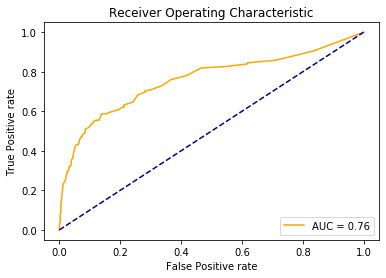

In [40]:
# Plot ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], color = 'darkblue', linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

K fold validation will not distribute minority and majority class samples in a appropriate ratio.
For imbalanced class problem, we need to divide the samples of minority and majority classes into appropriate ratio in train and test set.

In [41]:
# Statified KFold
from sklearn.model_selection import StratifiedKFold

strata_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scores=[]

auc_list = []

# enumerate the splits and summarize the distributions
for train_ix, test_ix in strata_kfold.split(X, y):
    # select rows
    train_X, test_X = X.iloc[train_ix], X.iloc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    model = classifier_forest.fit(train_X, train_y)
    predictions=classifier_forest.predict(test_X)
    scores.append(model.score(test_X,test_y))
    
    #write a code to compute auc for each random sample
    probs = classifier_forest.predict_proba(test_X)
    prob_positive = probs[:,1]
    fpr,tpr,threshold = metrics.roc_curve(test_y,prob_positive)
    roc_auc = metrics.auc(fpr,tpr)
    
    #append auc into the list auc_list
    auc_list.append(roc_auc)
    
print('\nScores from each prediction:', scores)
print('\nAverage k-fold score:', np.mean(scores))
print('\n AUC from each prediction:',auc_list)
print('\nAverage stratified k-fold AUC:', np.mean(auc_list))

Train: 0=5916, 1=756, Test: 0=658, 1=84
Train: 0=5916, 1=756, Test: 0=658, 1=84
Train: 0=5916, 1=756, Test: 0=658, 1=84
Train: 0=5916, 1=756, Test: 0=658, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84

Scores from each prediction: [0.898921832884097, 0.8975741239892183, 0.898921832884097, 0.8921832884097035, 0.893387314439946, 0.8893387314439946, 0.8906882591093117, 0.8866396761133604, 0.8974358974358975, 0.8906882591093117]

Average k-fold score: 0.8935779215818936

 AUC from each prediction: [0.7775998697351281, 0.7985146186134028, 0.7266970618034447, 0.7633883340570271, 0.7372436036819598, 0.7270783503660216, 0.7793723273175328, 0.7648401826484018, 0.7811118359063566, 0.7639523084728564]

Average stratified k-fold AUC: 0.7619798492602132


## Upsampling to resolve the issue of imbalance class problem

In [42]:
print(marketing['responded'].value_counts())
df_majority = marketing[marketing['responded']==0]
df_minority = marketing[marketing['responded']==1]

0    6574
1     840
Name: responded, dtype: int64


In [43]:
import sklearn.utils as ut
# Upsample minority class
df_minority_upsampled = ut.resample(df_minority,
                                    replace = True, # sample with replacement
                                    n_samples=6574, # to match majority class
                                   random_state=1)  # reproducible results

In [44]:
# Combine majority class with upsampled miniority class
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [45]:
# Display new class counts
df_upsampled['responded'].value_counts()

1    6574
0    6574
Name: responded, dtype: int64

In [46]:
df_upsampled.head() #Not standardized, only till encoded

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,6,1,0,1,0,1,0,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,-1.0,0,0
1,40.009804,1,1,6,1,0,1,0,1,0,...,0,1,1.4,93.918,-42.7,4.960,5228.1,-1.0,0,0
2,42.000000,9,1,3,1,0,1,0,1,0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,-1.0,0,0
3,55.000000,4,0,6,1,0,0,1,0,1,...,0,1,1.4,93.918,-42.7,4.962,5228.1,-1.0,0,0
4,40.009804,0,0,6,1,0,0,1,1,0,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,-1.0,1,0


For upsampling, we took non-standardized data. So, perform standardization now.

In [47]:
X_upsampled = df_upsampled.drop('responded',axis=1)
Y_upsampled = df_upsampled['responded']

In [48]:
# Save numerical columns in a list
cnames = ['custAge','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','pmonths','pastEmail']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for col in cnames:
    X_upsampled[col] = sc.fit_transform(X_upsampled[col].values.reshape(-1,1))
    
X_upsampled.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,1.377180,0,2,6,1,0,1,0,1,0,...,-0.325314,-0.453227,1,0.263351,-0.431335,-0.297790,0.690567,0.731752,-0.367893,-0.356188
1,-0.037966,1,1,6,1,0,1,0,1,0,...,-0.325314,-0.453227,1,1.141928,0.705235,-0.426537,1.098455,1.103462,-0.367893,-0.356188
2,0.149918,9,1,3,1,0,1,0,1,0,...,-0.325314,-0.453227,1,0.966213,0.825541,0.732185,1.043823,0.676513,-0.367893,-0.356188
3,1.377180,4,0,6,1,0,0,1,0,1,...,-0.325314,-0.453227,1,1.141928,0.705235,-0.426537,1.099516,1.103462,-0.367893,-0.356188
4,-0.037966,0,0,6,1,0,0,1,1,0,...,-0.325314,0.946264,0,-0.732371,-0.917306,-1.070271,-0.847633,-0.381078,-0.367893,0.213331


## Model Development

In [49]:
# Splitting the data into train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_upsampled,Y_upsampled,test_size=0.2,random_state=0)

### Fitting a Logistic Regression Model

In [50]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression()
model = classifier_log.fit(X_train,y_train)

# Predicting on the test data
y_pred_log = classifier_log.predict(X_test)

# Checking the accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_log)*100)

73.84030418250951


C:\Users\Karthik\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Fitting a Decision Tree Classifier


In [51]:
#Using DecisionTreeClassifier of tree class

from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier()
model = classifier_tree.fit(X_train,y_train)

# Predicting on the test data
y_pred_tree = classifier_tree.predict(X_test)

# Checking the accuracy
print(accuracy_score(y_test,y_pred_tree)*100)

94.63878326996198


### Fitting a Random Forest


In [52]:
#Using RandomForestClassifier method of ensemble class

from sklearn.ensemble import RandomForestClassifier
classifier_forest = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
model = classifier_forest.fit(X_train,y_train)

# Predicting on the test data
y_pred_forest = classifier_forest.predict(X_test)

# Checking the accuracy of the model
print(accuracy_score(y_test,y_pred_forest)*100)


96.95817490494296


## ROC Curve

Area under the curve: 0.9980085145984388


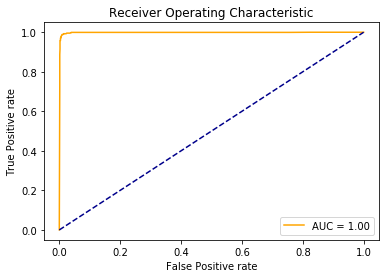

In [53]:
probs = classifier_forest.predict_proba(X_test)
probs

# Keep Probabilities of the positive class only 
from sklearn import metrics
prob_positive = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_positive)
roc_auc = metrics.auc(fpr,tpr)
print('Area under the curve:',roc_auc)

# Plot ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0,1],[0,1], color = 'darkblue', linestyle='--')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()